<a href="https://colab.research.google.com/github/amolsapkal16/EDA_Play-store-analysis/blob/main/Play_Store_App_Review_Analysis_Amol_Sapkal_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**# Importing libraries**

In [3]:
import osqp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

**Importing** **.csv files** 

In [6]:
Playstoredata_path = '/content/drive/MyDrive/Colab Notebooks/Play Store Analysis_Amol Sapkal/Play Store Data.csv'
Userreviews_path = '/content/drive/MyDrive/Colab Notebooks/Play Store Analysis_Amol Sapkal/User Reviews.csv'

**Creating** **a panda data frames**

In [7]:
Play_store_data = pd.read_csv(Playstoredata_path)
User_reviews = pd.read_csv(Userreviews_path)

In [8]:
Play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [9]:
Play_store_data2 = Play_store_data.copy()
Play_store_data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [10]:
Play_store_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Need to check correct data type of variables (columns)**

App - Object - No need to correct

Category - Object - No need to correct

Rating - Float - No need to correct

Reviews - Object - May need conversion to float/int

Size - Object - May need conversion to float/int

Installs - Object - May need conversion to float/int

Price - Object - May need conversion to float/int

Content rating - Object - No need to correct

Genres - Object - No need to correct

Last Updated - Object - No need to correct

Current Ver - Object - No need to correct

Android Ver - Object - No need to correct

**Following variable data types need to verify**

Reviews - Object - May need conversion to float/int

Size - Object - May need conversion to float/int

Installs - Object - May need conversion to float/int

Price - Object - May need conversion to float/int

**Following columns have missing values - Rating, Type, Content Rating, Current version, Android version**

In [ ]:
# Play_store_data1['Content Rating'] = Play_store_data1['Content Rating'].astype(str)

**Imputing missing values using lambda function**

---



In [ ]:
# Play_store_data1 = Play_store_data1.apply(lambda x:x.fillna(x.mean()) \
                                         # if x.dtype == 'float' else \
                                         # x.fillna(x.value_counts().index[0]))                                     
                                                                                                  

In [ ]:
# Play_store_data1.isnull().sum()

**Working on Reviews column for conversion to float**

---



In [11]:
np.unique(Play_store_data2['Reviews']) # Numerical written in quotes

array(['0', '1', '10', ..., '9975', '999', '9992'], dtype=object)

In [12]:
Play_store_data3 = Play_store_data2.loc[Play_store_data2['Reviews'] == '3.0M']
Play_store_data3 = Play_store_data3.shift(1, axis=1)
Play_store_data3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,NaN,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [13]:
Play_store_data2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
Play_store_data4 = pd.concat([Play_store_data2,Play_store_data3])
Play_store_data4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [15]:
Play_store_data5 = Play_store_data4.loc[Play_store_data4['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']
Play_store_data5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
Play_store_data4['Reviews'] = Play_store_data4['Reviews'].str.replace(',','')
Play_store_data4['Reviews'] = pd.to_numeric(Play_store_data4['Reviews'])

ValueError: ignored

In [17]:
Play_store_data3 = Play_store_data4.loc[Play_store_data4['Reviews'] == '3.0M']
Play_store_data3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Use regex code**

In [ ]:
# Play_store_data1['Reviews']= pd.to_numeric(Play_store_data1['Reviews'].replace('[^0-9\.-]','',regex=True))



**Analyzing and data cleaning in User Reviews data**

In [ ]:
User_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
User_reviews1 = User_reviews.copy() # make a copy of original data

**To look in to info of data**

In [ ]:
User_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**To see missing values**

In [ ]:
User_reviews1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

**Missing values found in all columns, except App**

**Imputing missing values**

In [ ]:
User_reviews1 = User_reviews1.apply(lambda x:x.fillna(x.mean()) \
                                          if x.dtype == 'float' else \
                                          x.fillna(x.value_counts().index[0]))

In [ ]:
User_reviews1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
User_reviews1['App'] 

0              10 Best Foods for You
1              10 Best Foods for You
2              10 Best Foods for You
3              10 Best Foods for You
4              10 Best Foods for You
                    ...             
64290    Houzz Interior Design Ideas
64291    Houzz Interior Design Ideas
64292    Houzz Interior Design Ideas
64293    Houzz Interior Design Ideas
64294    Houzz Interior Design Ideas
Name: App, Length: 64295, dtype: object

In [ ]:
User_reviews1['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

In [19]:
Play_store_dataIndex1 = Play_store_data4.copy()
Play_store_dataIndex1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [20]:
Play_store_dataIndex1 = Play_store_dataIndex1.set_index('App')


In [21]:
Play_store_dataIndex1.drop('Life Made WI-Fi Touchscreen Photo Frame', inplace=True)

In [22]:
Play_store_dataIndex1.reset_index(inplace=True)

In [23]:
Play_store_dataIndex1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Play_store_dataIndex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10840 non-null  object
 1   Category        10841 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10840 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [24]:
Play_store_dataIndex1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
Play_store_dataIndex1 = Play_store_dataIndex1.apply(lambda x:x.fillna(x.mean()) \
                                         if x.dtype == 'float' else \
                                         x.fillna(x.value_counts().index[0]))

In [26]:
Play_store_dataIndex1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
Play_store_dataIndex1['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                     Fr. Mike Schmitz Audio Teachings
10837                               Parkinson Exercices FR
10838                        The SCP Foundation DB fr nn5n
10839        iHoroscope - 2018 Daily Horoscope & Astrology
10840                                               ROBLOX
Name: App, Length: 10841, dtype: object

In [28]:
Play_store_dataIndex1['Category']

0                                 ART_AND_DESIGN
1                                 ART_AND_DESIGN
2                                 ART_AND_DESIGN
3                                 ART_AND_DESIGN
4                                 ART_AND_DESIGN
                          ...                   
10836                                     FAMILY
10837                                    MEDICAL
10838                        BOOKS_AND_REFERENCE
10839                                  LIFESTYLE
10840    Life Made WI-Fi Touchscreen Photo Frame
Name: Category, Length: 10841, dtype: object

In [29]:
Play_store_dataIndex1['Rating'] = Play_store_dataIndex1['Rating'].astype(float)
Play_store_dataIndex1['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    5.0
10837    4.4
10838    4.5
10839    4.5
10840    1.9
Name: Rating, Length: 10841, dtype: float64

In [30]:
np.unique(Play_store_dataIndex1['Rating']) 

array([1. , 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [31]:
Play_store_dataIndex1['Rating'] = Play_store_dataIndex1['Rating'].round(2)

In [32]:
np.unique(Play_store_dataIndex1['Rating'])

array([1. , 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

In [33]:
Play_store_dataIndex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Working on Reviews column for conversion to float/int**

In [34]:
np.unique(Play_store_dataIndex1['Reviews'])

array(['0', '1', '10', ..., '9975', '999', '9992'], dtype=object)

In [35]:
Play_store_dataIndex1['Reviews'] = Play_store_dataIndex1['Reviews'].astype(int)

In [36]:
np.unique(Play_store_dataIndex1['Reviews'])

array([       0,        1,        2, ..., 69119316, 78128208, 78158306])

**Working on Size column for conversion to float/int**




In [37]:
Play_store_dataIndex1['Size'][0]

'19M'

In [38]:
Play_store_dataIndex1['Size'] = Play_store_dataIndex1['Size'].str.replace('M','').str.replace(' ','')
Play_store_dataIndex1['Size']

0                      19
1                      14
2                     8.7
3                      25
4                     2.8
               ...       
10836                 3.6
10837                 9.5
10838    Varieswithdevice
10839                  19
10840                 3.0
Name: Size, Length: 10841, dtype: object

In [39]:
Play_store_dataIndex1['Size'] = Play_store_dataIndex1['Size'].replace('Varieswithdevice', 0)
Play_store_dataIndex1['Size']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836    3.6
10837    9.5
10838      0
10839     19
10840    3.0
Name: Size, Length: 10841, dtype: object

In [40]:
Play_store_dataIndex1['Size'][0]

'19'

In [41]:
Play_store_dataIndex1['Size'] = Play_store_dataIndex1['Size'].str.replace('k','').astype(float)

In [42]:
Play_store_dataIndex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


**Working on Installs to convert to int**

In [43]:
Play_store_dataIndex1['Installs'] = Play_store_dataIndex1['Installs'].str.replace('k','').replace(' ','')
Play_store_dataIndex1['Installs'] = Play_store_dataIndex1['Installs'].str.replace('+','').replace(',','')
Play_store_dataIndex1['Installs'] = Play_store_dataIndex1['Installs'].str.replace(',','').astype(int)
Play_store_dataIndex1['Installs']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836         100
10837        1000
10838        1000
10839    10000000
10840        1000
Name: Installs, Length: 10841, dtype: int64

In [44]:
np.unique(Play_store_dataIndex1['Price'])

array(['$0.99', '$1.00', '$1.04', '$1.20', '$1.26', '$1.29', '$1.49',
       '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.96',
       '$1.97', '$1.99', '$10.00', '$10.99', '$109.99', '$11.99',
       '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99',
       '$154.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.90',
       '$19.99', '$2.00', '$2.49', '$2.50', '$2.56', '$2.59', '$2.60',
       '$2.90', '$2.95', '$2.99', '$200.00', '$24.99', '$25.99', '$28.99',
       '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49',
       '$3.61', '$3.88', '$3.90', '$3.95', '$3.99', '$30.99', '$33.99',
       '$37.99', '$379.99', '$389.99', '$39.99', '$394.99', '$399.99',
       '$4.29', '$4.49', '$4.59', '$4.60', '$4.77', '$4.80', '$4.84',
       '$4.85', '$4.99', '$400.00', '$46.99', '$5.00', '$5.49', '$5.99',
       '$6.49', '$6.99', '$7.49', '$7.99', '$74.99', '$79.99', '$8.49',
       '$8.99', '$89.99', '$9.00', '$9.99', '0'], dtype=object)

**Working on Price to convert to int**

In [45]:
Play_store_dataIndex1['Price'] = Play_store_dataIndex1['Price'].str.replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [46]:
np.unique(Play_store_dataIndex1['Price'])

array(['0', '0.99', '1.00', '1.04', '1.20', '1.26', '1.29', '1.49',
       '1.50', '1.59', '1.61', '1.70', '1.75', '1.76', '1.96', '1.97',
       '1.99', '10.00', '10.99', '109.99', '11.99', '12.99', '13.99',
       '14.00', '14.99', '15.46', '15.99', '154.99', '16.99', '17.99',
       '18.99', '19.40', '19.90', '19.99', '2.00', '2.49', '2.50', '2.56',
       '2.59', '2.60', '2.90', '2.95', '2.99', '200.00', '24.99', '25.99',
       '28.99', '29.99', '299.99', '3.02', '3.04', '3.08', '3.28', '3.49',
       '3.61', '3.88', '3.90', '3.95', '3.99', '30.99', '33.99', '37.99',
       '379.99', '389.99', '39.99', '394.99', '399.99', '4.29', '4.49',
       '4.59', '4.60', '4.77', '4.80', '4.84', '4.85', '4.99', '400.00',
       '46.99', '5.00', '5.49', '5.99', '6.49', '6.99', '7.49', '7.99',
       '74.99', '79.99', '8.49', '8.99', '89.99', '9.00', '9.99'],
      dtype=object)

In [47]:
Play_store_dataIndex1['Price'] =pd.to_numeric(Play_store_dataIndex1['Price'])
Play_store_dataIndex1['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

In [48]:
Play_store_dataIndex1.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.219860,4.441119e+05,37.031719,1.546291e+07,1.027273
std,0.484688,2.927629e+06,98.869003,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.600000,1.000000e+03,0.000000
50%,4.400000,2.094000e+03,15.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,34.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


**To calculate mean, median and mode of above columns**

Rating - 
mean - 4.2198
median - 4.4
mode - 4.4 

In [49]:
Play_store_dataIndex1['Rating'].mean()

4.219859791532146

In [50]:
Play_store_dataIndex1['Rating'].median()

4.4

In [51]:
Play_store_dataIndex1['Rating'].mode()

0    4.4
dtype: float64

Reviews 

In [52]:
Play_store_dataIndex1['Reviews'].mean()

444111.92629831197

In [53]:
Play_store_dataIndex1['Reviews'].median()

2094.0

In [54]:
Play_store_dataIndex1['Reviews'].mode()

0    0
dtype: int64

Price

In [55]:
Play_store_dataIndex1['Price'].mean()

1.0272733142699015

In [56]:
Play_store_dataIndex1['Price'].median()

0.0

In [57]:
Play_store_dataIndex1['Price'].mode()

0    0.0
dtype: float64

In [58]:
Play_store_dataIndex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [59]:
Play_store_dataIndex1 = Play_store_dataIndex1.apply(lambda x:x.fillna(x.mean()) \
                                         if x.dtype == 'float' else \
                                         x.fillna(x.value_counts().index[0]))

**To see Correlation**

In [60]:
numerical_data = Play_store_dataIndex1.select_dtypes(exclude=[object])

In [61]:
correlation = numerical_data.corr()
correlation

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.058408,-0.016289,0.040065,-0.018373
Reviews,0.058408,1.000000,0.017288,0.643123,-0.009666
Size,-0.016289,0.017288,1.000000,0.007364,0.014490
Installs,0.040065,0.643123,0.007364,1.000000,-0.011688
Price,-0.018373,-0.009666,0.014490,-0.011688,1.000000


**Dropping missing values**

In [ ]:
# Play_store_dataIndex1 = Play_store_dataIndex1.dropna(axis=0, inplace=True)

In [62]:
Play_store_dataIndex1.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.219860,4.441119e+05,37.031719,1.546291e+07,1.027273
std,0.484688,2.927629e+06,90.810772,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.400000,2.094000e+03,20.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,37.031719,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,400.000000


**Scatter plots**

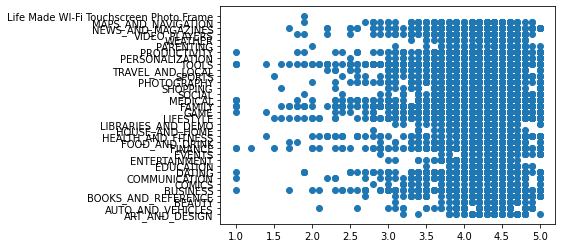

In [ ]:
from unicodedata import category
plt.scatter (Play_store_dataIndex1['Rating'],Play_store_dataIndex1['Category'])

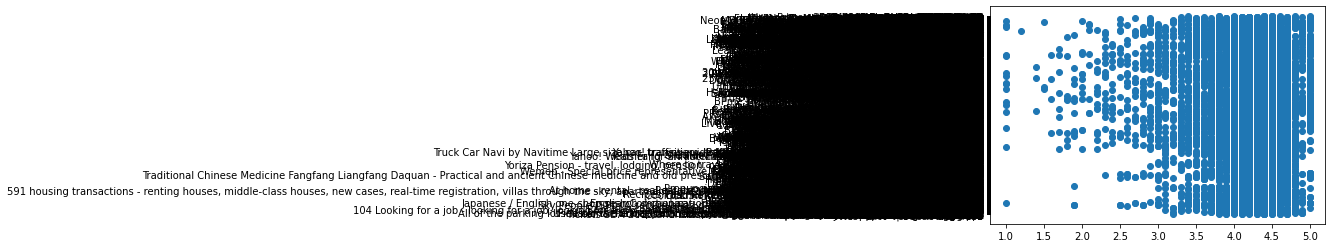

In [ ]:
from unicodedata import category
plt.scatter (Play_store_dataIndex1['Rating'],Play_store_dataIndex1['App'])

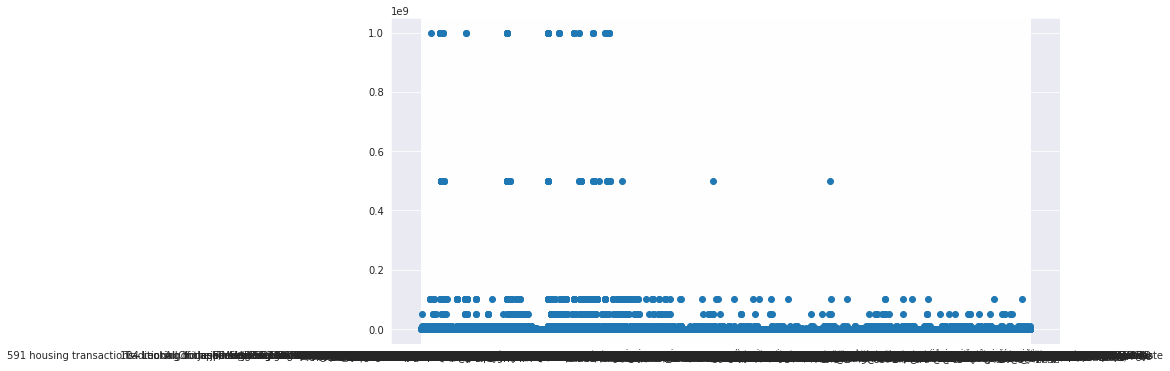

In [67]:
from unicodedata import category
plt.figure(figsize=(12, 6))
plt.scatter (Play_store_dataIndex1['App'],Play_store_dataIndex1['Installs'])

**Finding number of apps per category**

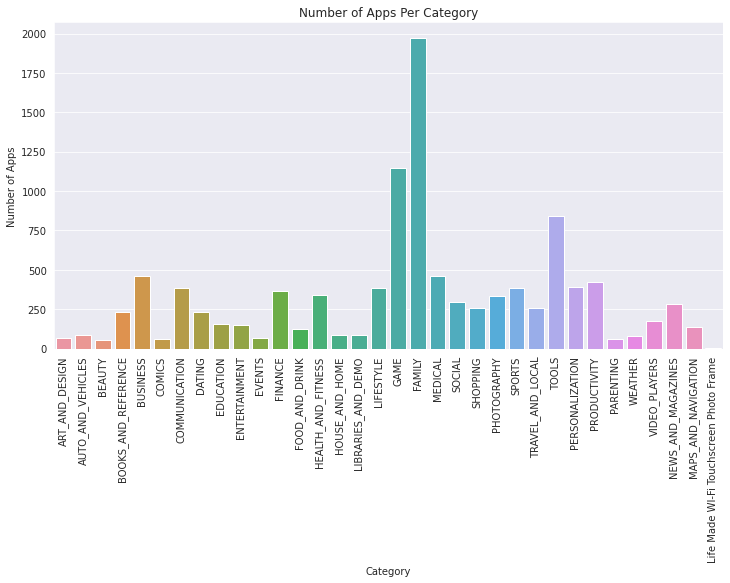

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=Play_store_dataIndex1)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [66]:
Play_store_dataIndex1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Finding highest Installs, Rating, Reviews**

In [68]:
Play_store_dataIndex1['Installs'].max()

1000000000